In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import math
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
import pickle

In [280]:
pd.set_option('display.max_columns', None)

In [281]:
df = pd.read_csv("/content/car_insurance_claim.csv")
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [282]:
df.drop(['BIRTH'], axis = 1 , inplace = True)
df.drop(['ID'], axis = 1 , inplace = True)

In [283]:
df.isna().sum()

,0
KIDSDRIV,0
AGE,7
HOMEKIDS,0
YOJ,548
INCOME,570
PARENT1,0
HOME_VAL,575
MSTATUS,0
GENDER,0
EDUCATION,0


In [284]:
df.duplicated().sum()

1

In [285]:
df.drop_duplicates(inplace=True)

In [286]:
df.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [287]:
amount = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']

In [288]:
for col in amount:
        df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

In [289]:
df.isna().sum()

,0
KIDSDRIV,0
AGE,7
HOMEKIDS,0
YOJ,548
INCOME,570
PARENT1,0
HOME_VAL,575
MSTATUS,0
GENDER,0
EDUCATION,0


In [290]:
con_na =['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE']

In [291]:
for fill in con_na:
  df[fill].fillna(df[fill].mean(), inplace=True)

In [292]:
df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)

In [293]:
df.isna().sum()

,0
KIDSDRIV,0
AGE,0
HOMEKIDS,0
YOJ,0
INCOME,0
PARENT1,0
HOME_VAL,0
MSTATUS,0
GENDER,0
EDUCATION,0


In [294]:
df.reset_index(drop=True)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.00000,No,0.0,z_No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.00000,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.00000,No,0.0,z_No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.00000,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010.0,4,z_SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,61568.83568,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10296,1,45.0,2,9.0,164669.00000,No,386273.0,Yes,M,PhD,Manager,21,Private,13270.0,15,Minivan,no,0.0,0,No,2,0.0,17.0,0,Highly Urban/ Urban
10297,0,46.0,0,9.0,107204.00000,No,332591.0,Yes,M,Masters,z_Blue Collar,36,Commercial,24490.0,6,Panel Truck,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10298,0,48.0,0,15.0,39837.00000,No,170611.0,Yes,z_F,<High School,z_Blue Collar,12,Private,13820.0,7,z_SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
10299,0,50.0,0,7.0,43445.00000,No,149248.0,Yes,z_F,Bachelors,Home Maker,36,Private,22550.0,6,Minivan,no,0.0,0,No,0,0.0,11.0,0,Highly Urban/ Urban


In [295]:
df['URBANICITY'].unique()

array(['Highly Urban/ Urban', 'z_Highly Rural/ Rural'], dtype=object)

In [296]:
df['MSTATUS'] = df['MSTATUS'].apply(lambda x: str(x).replace('z_', ''))
df['GENDER'] = df['GENDER'].apply(lambda x: str(x).replace('z_', ''))
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: str(x).replace('z_', ''))
df['EDUCATION'] = df['EDUCATION'].apply(lambda x: 'High School' if x == '<High School' else x)
df['CAR_TYPE'] = df['CAR_TYPE'].apply(lambda x: str(x).replace('z_', ''))
df['URBANICITY'] = df['URBANICITY'].apply(lambda x: str(x).replace('z_', ''))
df['OCCUPATION'] = df['OCCUPATION'].apply(lambda x: x.replace('z_', ''))

In [297]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
KIDSDRIV,10301.0,0.169304,0.506533,0.0,0.0,0.000000,0.0,4.0
AGE,10301.0,44.837964,8.603746,16.0,39.0,45.000000,51.0,81.0
HOMEKIDS,10301.0,0.720513,1.116355,0.0,0.0,0.000000,1.0,5.0
YOJ,10301.0,10.473700,3.998197,0.0,9.0,11.000000,13.0,23.0
INCOME,10301.0,61568.835680,46126.704148,0.0,29161.0,57073.000000,83222.0,367030.0
HOME_VAL,10301.0,154513.740284,125533.973895,0.0,0.0,154513.740284,233085.0,885282.0
TRAVTIME,10301.0,33.416853,15.870398,5.0,22.0,33.000000,44.0,142.0
BLUEBOOK,10301.0,15660.015532,8429.169220,1500.0,9200.0,14400.000000,20890.0,69740.0
TIF,10301.0,5.329580,4.110773,1.0,1.0,4.000000,7.0,25.0
OLDCLAIM,10301.0,4034.369479,8733.476588,0.0,0.0,0.000000,4648.0,57037.0


In [298]:
df['CAR_AGE']=df['CAR_AGE'].apply(lambda x: -1*x if x<=0 else x)

In [299]:
df.shape

(10301, 25)

In [300]:
# Assuming 'COLUMN_NAME' is the column where you want to convert 'Yes' and 'No' to 1 and 0
df['PARENT1'] = df['PARENT1'].replace({'Yes': 1, 'No': 0})
df['MSTATUS'] = df['MSTATUS'].replace({'Yes': 1, 'No': 0})
df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0})
df['RED_CAR'] = df['RED_CAR'].replace({'yes': 1, 'no': 0})
df['REVOKED'] = df['REVOKED'].replace({'Yes': 1, 'No': 0})
df['CAR_USE'] = df['CAR_USE'].replace({'Private': 1, 'Commercial': 0})
df['URBANICITY'] = df['URBANICITY'].replace({'Highly Urban/ Urban': 1, 'Highly Rural/ Rural': 0})

In [301]:
df.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.00000,0,0.0,0,1,PhD,Professional,14,1,14230.0,11,Minivan,1,4461.0,2,0,3,0.0,18.0,0,1
1,0,43.0,0,11.0,91449.00000,0,257252.0,0,1,High School,Blue Collar,22,0,14940.0,1,Minivan,1,0.0,0,0,0,0.0,1.0,0,1
2,0,48.0,0,11.0,52881.00000,0,0.0,0,1,Bachelors,Manager,26,1,21970.0,1,Van,1,0.0,0,0,2,0.0,10.0,0,1
3,0,35.0,1,10.0,16039.00000,0,124191.0,1,0,High School,Clerical,5,1,4010.0,4,SUV,0,38690.0,2,0,3,0.0,10.0,0,1
4,0,51.0,0,14.0,61568.83568,0,306251.0,1,1,High School,Blue Collar,32,1,15440.0,7,Minivan,1,0.0,0,0,0,0.0,6.0,0,1


In [302]:
le = LabelEncoder()
df['EDUCATION'] = le.fit_transform(df['EDUCATION'])
df['OCCUPATION'] = le.fit_transform(df['OCCUPATION'])
df['CAR_TYPE'] = le.fit_transform(df['CAR_TYPE'])

In [303]:
df.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.00000,0,0.0,0,1,3,6,14,1,14230.0,11,0,1,4461.0,2,0,3,0.0,18.0,0,1
1,0,43.0,0,11.0,91449.00000,0,257252.0,0,1,1,0,22,0,14940.0,1,0,1,0.0,0,0,0,0.0,1.0,0,1
2,0,48.0,0,11.0,52881.00000,0,0.0,0,1,0,5,26,1,21970.0,1,5,1,0.0,0,0,2,0.0,10.0,0,1
3,0,35.0,1,10.0,16039.00000,0,124191.0,1,0,1,1,5,1,4010.0,4,3,0,38690.0,2,0,3,0.0,10.0,0,1
4,0,51.0,0,14.0,61568.83568,0,306251.0,1,1,1,0,32,1,15440.0,7,0,1,0.0,0,0,0,0.0,6.0,0,1


In [304]:
df.corr()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
KIDSDRIV,1.000000,-0.078448,0.463644,0.041698,-0.041898,0.200147,-0.015101,0.041683,-0.039679,-0.046234,-0.019876,0.012198,0.004170,-0.028512,-0.005865,0.000139,-0.040463,0.023872,0.038930,0.033628,0.048400,0.068273,-0.057274,0.108404,-0.043695
AGE,-0.078448,1.000000,-0.447563,0.136691,0.181220,-0.310952,0.203914,0.086999,0.069630,0.170572,0.059231,-0.001587,0.027289,0.166187,-0.001959,-0.001489,0.025966,-0.033398,-0.037669,-0.045058,-0.075741,-0.049050,0.173311,-0.106926,0.042332
HOMEKIDS,0.463644,-0.447563,1.000000,0.075641,-0.155741,0.448707,-0.104598,0.046022,-0.113344,-0.116117,-0.031953,-0.000739,0.011907,-0.108579,0.007444,0.042928,-0.068028,0.029728,0.038619,0.044159,0.064248,0.068628,-0.154143,0.123015,-0.061801
YOJ,0.041698,0.136691,0.075641,1.000000,0.277746,-0.038119,0.257838,0.136879,0.077306,0.045496,-0.184996,-0.016679,-0.025304,0.144212,0.023397,-0.052176,0.050462,-0.004921,-0.022850,-0.009667,-0.040428,-0.025581,0.061091,-0.064423,0.076859
INCOME,-0.041898,0.181220,-0.155741,0.277746,1.000000,-0.065391,0.545899,-0.034767,0.110871,0.353396,-0.051616,-0.050207,-0.087106,0.417962,0.002371,-0.069321,0.064645,-0.038226,-0.047896,-0.022304,-0.061975,-0.056206,0.392933,-0.138754,0.195192
PARENT1,0.200147,-0.310952,0.448707,-0.038119,-0.065391,1.000000,-0.243754,-0.474832,-0.068858,-0.074382,-0.006125,-0.015821,-0.002395,-0.049516,0.009004,0.020202,-0.044446,0.039296,0.061589,0.050663,0.070114,0.096219,-0.064191,0.158436,-0.022294
HOME_VAL,-0.015101,0.203914,-0.104598,0.257838,0.545899,-0.243754,1.000000,0.441006,0.076854,0.177118,-0.074855,-0.034249,-0.032955,0.254160,0.006633,-0.043095,0.029594,-0.058276,-0.091261,-0.043582,-0.089554,-0.086838,0.210276,-0.180224,0.113733
MSTATUS,0.041683,0.086999,0.046022,0.136879,-0.034767,-0.474832,0.441006,1.000000,-0.001016,-0.021170,0.001987,0.006032,0.011819,-0.007251,-0.006756,0.004135,-0.013929,-0.044582,-0.070509,-0.040749,-0.050839,-0.083826,-0.034148,-0.129687,-0.006485
GENDER,-0.039679,0.069630,-0.113344,0.077306,0.110871,-0.068858,0.076854,-0.001016,1.000000,0.026571,-0.043625,-0.010510,-0.282112,0.062393,-0.007081,-0.313296,0.663161,-0.004107,0.014075,-0.011411,-0.011029,0.003421,0.024854,-0.021947,0.046248
EDUCATION,-0.046234,0.170572,-0.116117,0.045496,0.353396,-0.074382,0.177118,-0.021170,0.026571,1.000000,-0.069220,-0.049609,0.103734,0.158592,0.008094,-0.008449,0.004567,-0.012930,-0.017960,-0.006058,-0.032912,-0.032098,0.375779,-0.062943,0.138010


<Axes: >

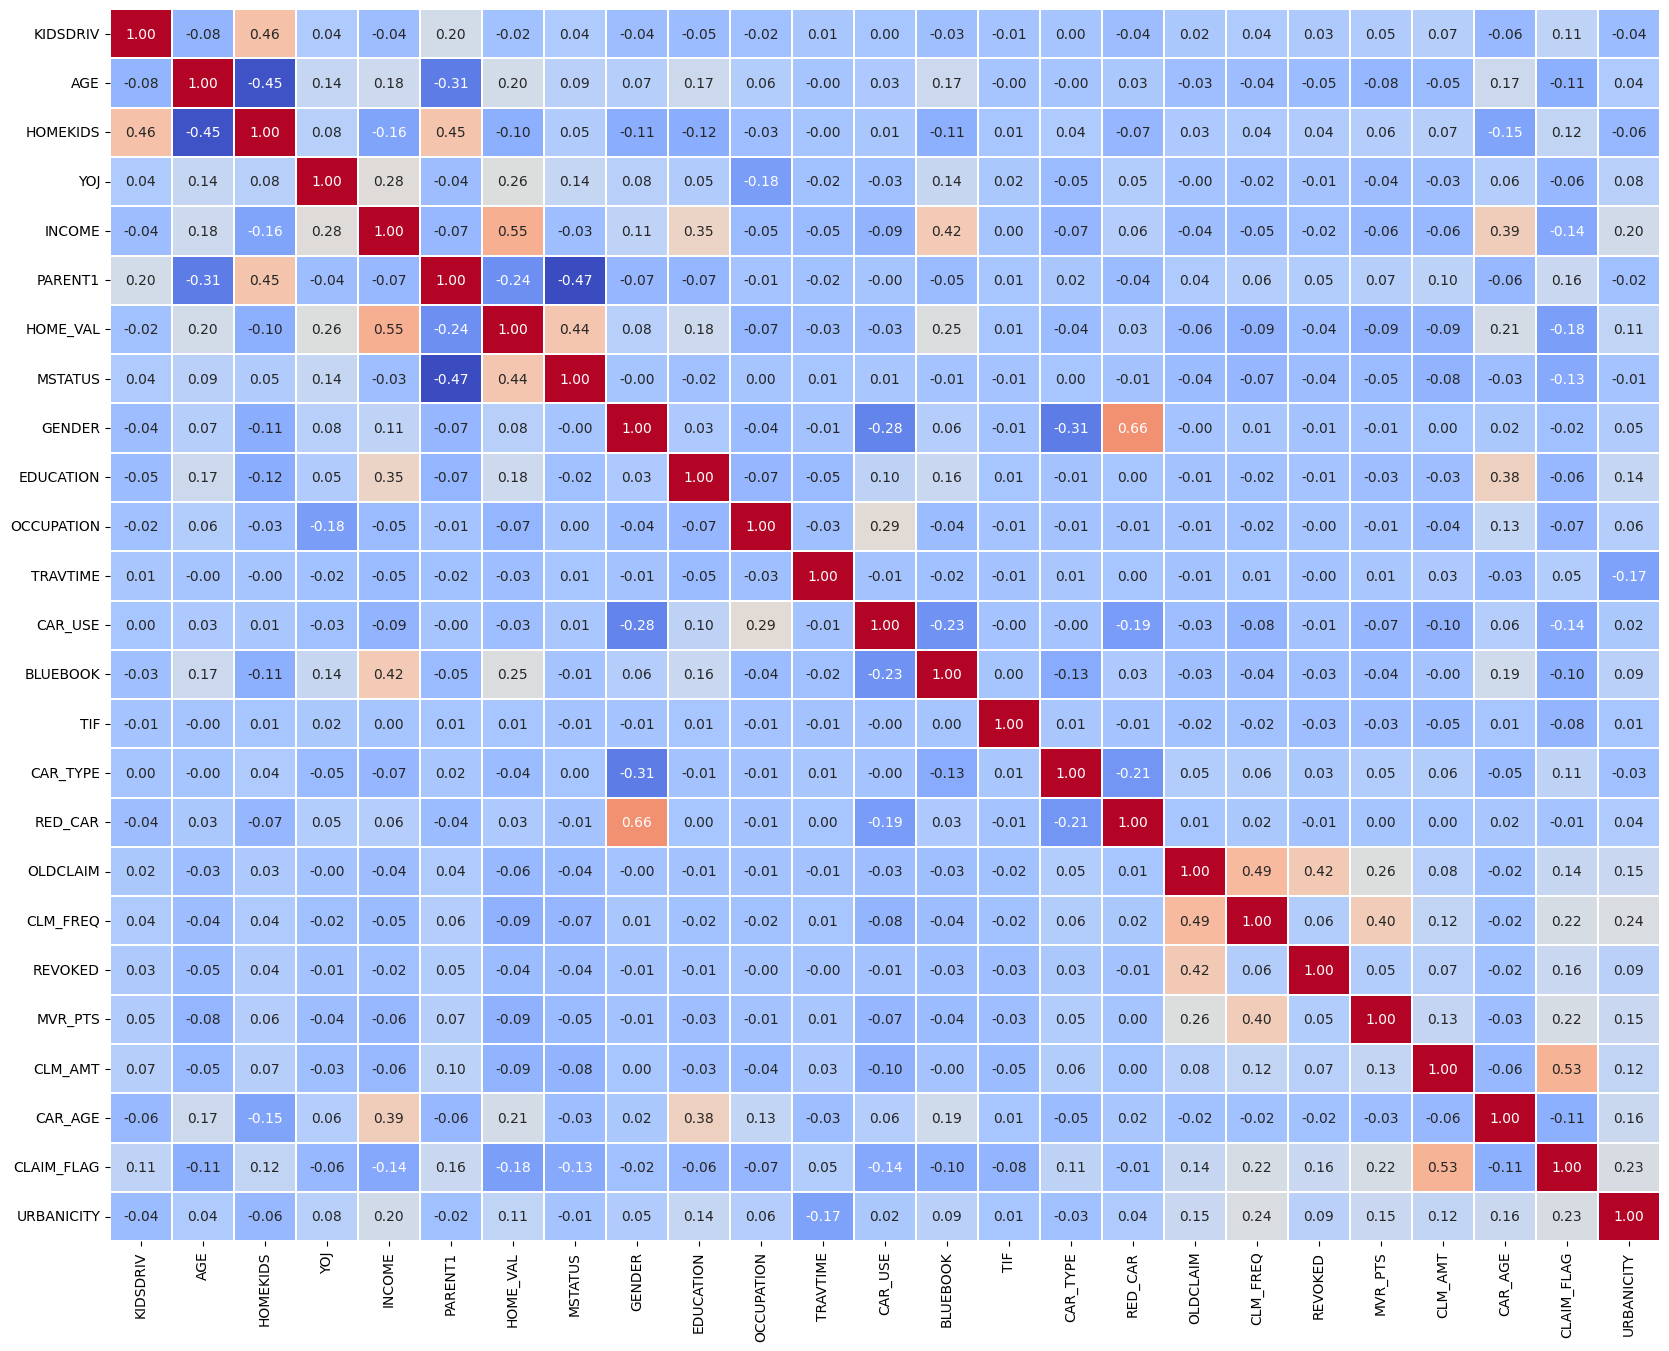

In [305]:
plt.figure(figsize=(20,16),dpi=100)
sns.heatmap(df.corr(),linewidths=0.2,annot=True,cbar=False,fmt='.2f',cmap='coolwarm')

In [306]:
df.head(1)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,3,6,14,1,14230.0,11,0,1,4461.0,2,0,3,0.0,18.0,0,1


In [307]:
df['CLM_AMT'].value_counts()

,count
CLM_AMT,
0.0,7555
2327.0,4
3674.0,4
3350.0,4
4363.0,4
...,...
5837.0,1
9663.0,1
856.0,1


In [308]:
df[df['CLM_AMT']==2327.0]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
1117,0,42.0,0,10.0,58453.00000,0,202236.000000,0,0,0,0,29,0,9480.0,4,4,0,0.0,0,0,1,2327.0,8.298903,1,1
3493,0,36.0,1,0.0,0.00000,1,154513.740284,0,0,1,7,18,0,21620.0,9,3,0,6259.0,1,0,3,2327.0,1.000000,1,1
7558,0,46.0,0,0.0,61568.83568,0,0.000000,0,0,1,7,43,0,8110.0,10,3,0,0.0,0,0,0,2327.0,8.000000,1,1
8135,2,44.0,2,0.0,0.00000,0,0.000000,1,1,0,7,17,0,1500.0,13,0,1,0.0,0,0,4,2327.0,5.000000,1,1


In [309]:
mean_income = df[df['INCOME'] != 0.00000]['INCOME'].mean()

In [310]:
df['INCOME']= df['INCOME'].apply(lambda i: mean_income if i ==0.00000 else i)

In [313]:
df.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [314]:
cont = ['AGE', 'INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

In [315]:
for i in cont:
  print(f'skewness of {i} = {skew(df[i])}')

skewness of AGE = -0.03471541478991895
skewness of INCOME = 1.3924332406953819
skewness of HOME_VAL = 0.5064221499667928
skewness of BLUEBOOK = 0.7692000925639272
skewness of OLDCLAIM = 3.119121414258397


In [316]:
def chart(column):
  plt.figure(figsize=(10, 4))
  plt.subplot(1,2,1)
  sns.histplot(data= df,x=column,kde=True,bins=30,color='red')

  plt.subplot(1,2,2)
  sns.boxplot(df[column])
  plt.show

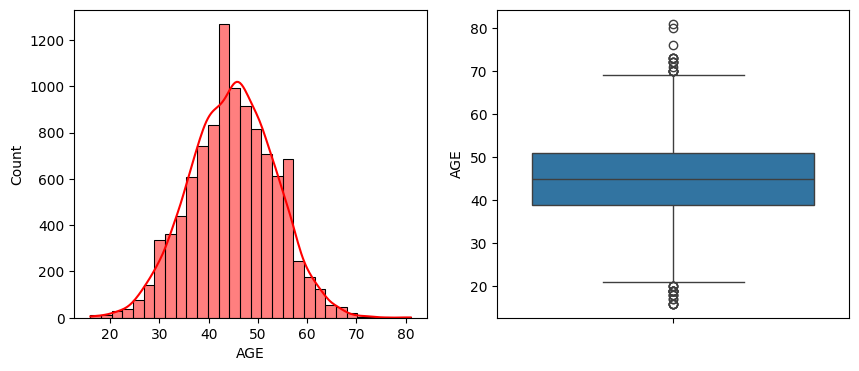

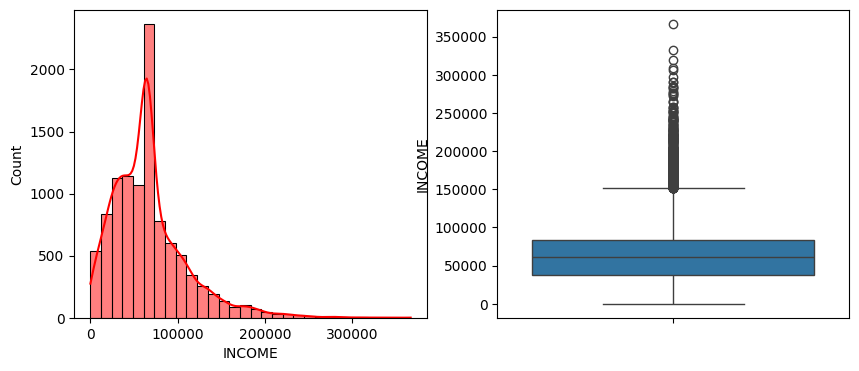

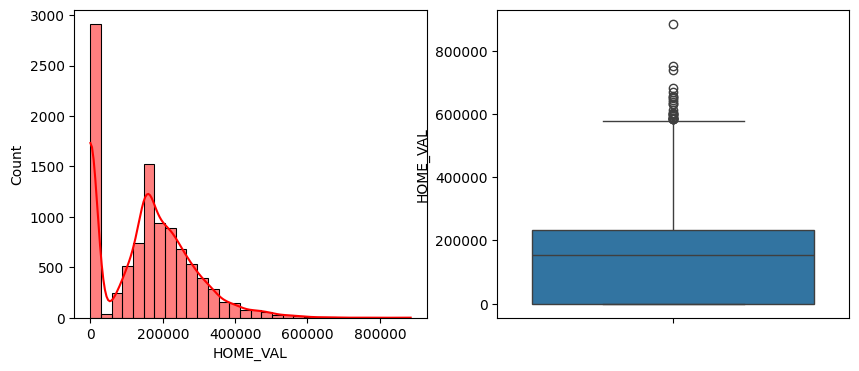

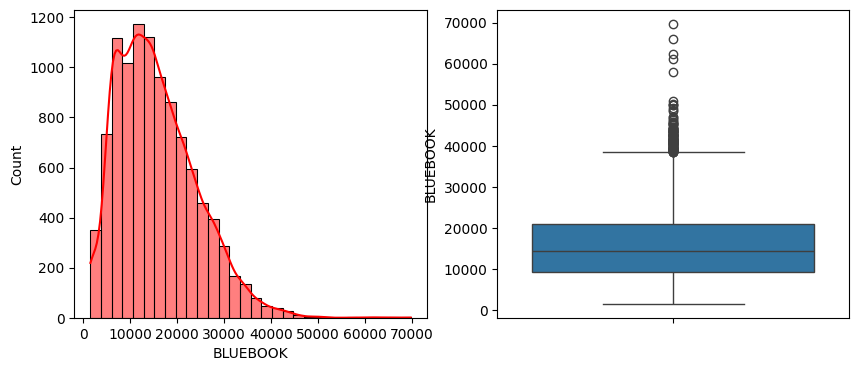

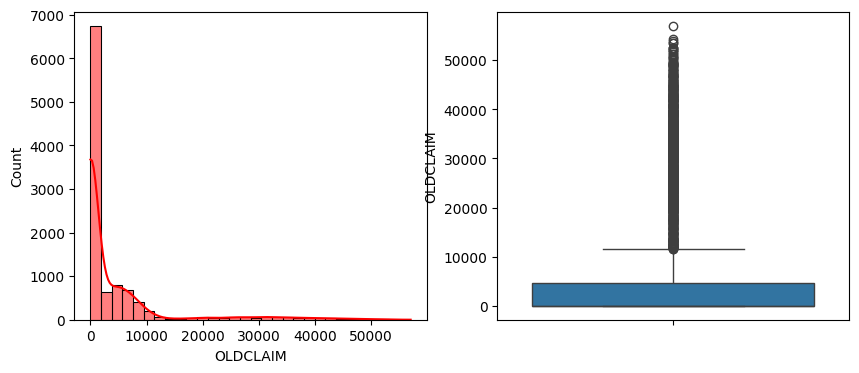

In [317]:
for i in cont:
  chart(i)

In [318]:
df.shape

(10301, 25)

In [319]:
# function to remove outliers using the IQR method
def outliers(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    df=df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]
    return df



In [320]:
df.shape

(10301, 25)

In [321]:
for i in cont:
  outliers(df,i)

In [322]:
df.shape

(10301, 25)

In [323]:
df.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'CAR_USE',
       'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ',
       'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE', 'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [324]:
df.drop(['YOJ','GENDER', 'EDUCATION', 'OCCUPATION', 'TRAVTIME', 'BLUEBOOK', 'RED_CAR'], axis=1, inplace=True)

In [346]:
df[df['CLM_AMT']!=0]

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,CAR_USE,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
6,0,34.0,1,125301.000000,1,0.0,0,0,1,4,0.0,0,0,0,2946.0,7.0,1,1
8,1,40.0,1,50815.000000,1,0.0,0,1,6,0,3295.0,1,0,2,6477.0,1.0,1,1
10,1,37.0,2,107961.000000,0,333680.0,1,0,1,5,2374.0,1,1,10,4021.0,7.0,1,1
11,0,34.0,0,62978.000000,0,0.0,0,1,1,3,0.0,0,0,0,2501.0,1.0,1,1
13,0,53.0,0,77100.000000,0,0.0,0,1,1,4,0.0,0,0,0,6077.0,11.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10264,0,43.0,0,66731.962998,0,55203.0,1,1,9,0,3035.0,4,0,0,471.0,14.0,1,1
10269,0,46.0,0,68360.000000,0,237457.0,0,0,1,0,6560.0,3,0,7,3135.0,11.0,1,1
10285,0,41.0,0,92185.000000,0,289370.0,1,1,11,0,0.0,0,0,0,1815.0,10.0,1,1
10287,0,45.0,0,52966.000000,0,0.0,0,0,6,2,16239.0,2,1,5,2967.0,1.0,1,1


In [349]:
te=[0,	34.0,	1,	125301.000000,	1,	0.0,	0,	0,	1,	4,	0.0,	0,	0,	0,	7.0,	1,	1]

In [350]:
tes=pd.DataFrame([te])
tes.shape

(1, 17)

In [325]:
#Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

In [326]:
x=df.drop('CLM_AMT', axis=1)
y = df['CLM_AMT']

In [327]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [328]:
res=[]
def model_check(name, model):
  model= model.fit(x_train, y_train)
  y_predict= model.predict(x_test)

  data ={'Model_Name': name,
         'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
         'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
         'R2_Score': round(r2_score(y_test, y_predict), 4)}

  res.append(data)

In [329]:
model_check('DecisionTreeRegressor', DecisionTreeRegressor())

In [330]:
model_check('LinearRegression', LinearRegression())

In [331]:
model_check('RandomForestRegressor', RandomForestRegressor())

In [332]:
model_check('ExtraTreesRegressor', ExtraTreesRegressor())

In [333]:
model_check('GradientBoostingRegressor', GradientBoostingRegressor())

In [334]:
model_check('AdaBoost Regressor', AdaBoostRegressor())

In [335]:
reg_model = pd.DataFrame(res)

In [336]:
reg_model

,Model_Name,Mean_Absolute_Error,Mean_Square_Error,R2_Score
0,DecisionTreeRegressor,1493.6055,4.011944e+07,-0.9464
1,LinearRegression,987.6084,1.503261e+07,0.2707
2,RandomForestRegressor,1026.4983,1.694200e+07,0.1781
3,ExtraTreesRegressor,1033.0505,1.706443e+07,0.1721
4,GradientBoostingRegressor,977.0194,1.591932e+07,0.2277
5,AdaBoost Regressor,2248.0168,3.081335e+07,-0.4949


In [337]:
# As RandomForest have good R2 score and less MAE, MSE
#hypertune the model
model= RandomForestRegressor().fit(x_train, y_train)
y_predict= model.predict(x_test)

data ={'Mean_Absolute_Error': round(mean_absolute_error(y_test, y_predict),4),
        'Mean_Square_Error': round(mean_squared_error(y_test, y_predict),4),
        'R2_Score': round(r2_score(y_test, y_predict), 4)}

data

{'Mean_Absolute_Error': 1022.0819,
 'Mean_Square_Error': 16953776.5852,
 'R2_Score': 0.1775}

In [338]:
pickle.dump(model, open('Regression_model', 'wb'))

In [339]:
path ='/content/Regression_model'

In [340]:
model1=pickle.load(open(path, 'rb'))

In [341]:
x_train.head(1)

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,CAR_USE,TIF,CAR_TYPE,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,URBANICITY
9008,0,41.0,0,29541.0,0,204260.0,1,1,10,0,3265.0,2,0,1,1.0,0,1


In [343]:
pr = [0,	41.0,	0,	29541.0,	0,	204260.0,	1,	1,	10,	0,	3265.0,	2,	0,	1,	1.0,	0,	1]
d=pd.DataFrame([pr])

In [345]:
y_train.head(1)

,CLM_AMT
9008,0.0


In [344]:
model1.predict(d)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.])